In [2]:
import numpy as np 
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_df=pd.read_csv(r"../Data Files/train.csv")
test_df=pd.read_csv(r"../Data Files/test.csv")

# Filling missing Values

In [8]:
test_df['Age'].mean()

30.272590361445783

In [9]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

In [10]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

In [11]:
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column,axis=1,inplace=True)

In [12]:
print('check the nan value in train data')
print(train_df.isnull().sum())
print('___'*30)
print('check the nan value in test data')
print(test_df.isnull().sum())

check the nan value in train data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64
__________________________________________________________________________________________
check the nan value in test data
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64


# Feature engineering

In [13]:
## combine test and train as single to apply some function
all_data=[train_df,test_df]

In [14]:
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [16]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [17]:
## create bin for age features
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [18]:
## create bin for fare features
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [19]:
### for our reference making a copy of both DataSet start working for copy of dataset
traindf=train_df
testdf=test_df

In [20]:
all_dat=[traindf,testdf]

In [21]:
for dataset in all_dat:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

In [22]:
drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace = True)

## now every thing almost ready only one step we converted the catergical features in numerical by using dummy variable

In [23]:
testdf.head(2)

PassengerId  Pclass     Sex  SibSp  Parch Embarked  FamilySize Title  \
0          892       3    male      0      0        Q           1    Mr   
1          893       3  female      1      0        S           2   Mrs   

  Age_bin  Fare_bin  
0   Adult  Low_fare  
1   Elder  Low_fare

In [24]:
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [25]:
testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [26]:
testdf.head()

PassengerId  Pclass  SibSp  Parch  FamilySize  Sex_female  Sex_male  \
0          892       3      0      0           1           0         1   
1          893       3      1      0           2           1         0   
2          894       2      0      0           1           0         1   
3          895       3      0      0           1           0         1   
4          896       3      1      1           3           1         0   

   Title_Master  Title_Miss  Title_Mr  ...  Age_type_Teenage  Age_type_Adult  \
0             0           0         1  ...                 0               1   
1             0           0         0  ...                 0               0   
2             0           0         1  ...                 0               0   
3             0           0         1  ...                 0               1   
4             0           0         0  ...                 0               1   

   Age_type_Elder  Em_type_C  Em_type_Q  Em_type_S  Fare_type_Low_fare  \
0               0          0          1          0                   1   
1               1          0          0          1                   1   
2               1          0          1          0                   0   
3               0          0          0          1                   0   
4               0          0          0          1                   0   

   Fare_type_median_fare  Fare_type_Average_fare  Fare_type_high_fare  
0                      0                       0                    0  
1                      0                       0                    0  
2                      1                       0                    0  
3                      1                       0                    0  
4                      1                       0                    0  

[5 rows x 23 columns]

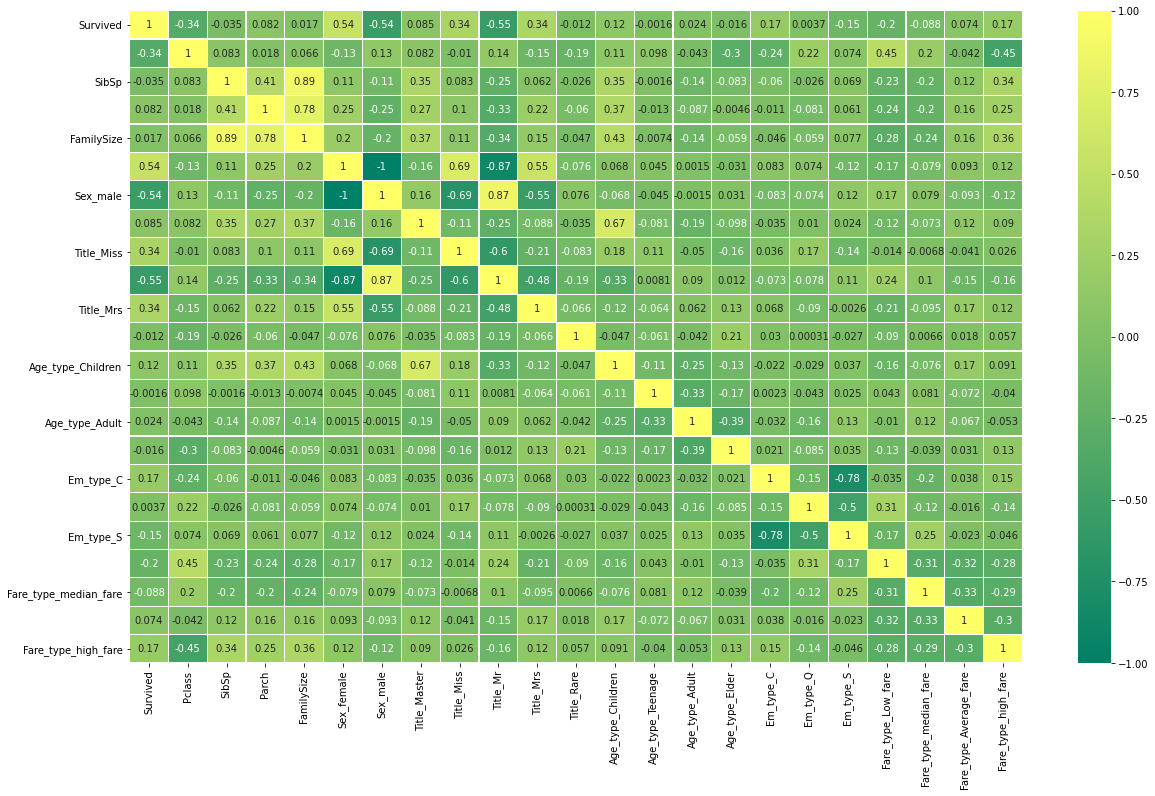

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(traindf.corr(),annot=True,cmap='summer',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

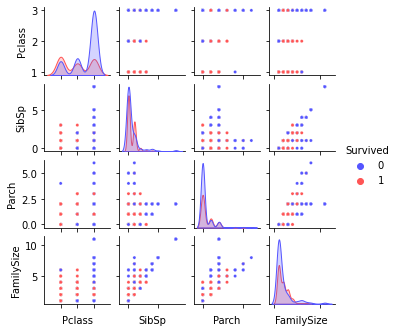

In [32]:
g = sns.pairplot(data=train_df, hue='Survived', palette = 'seismic',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [33]:
traindf.to_csv('processedTrain.csv')
testdf.to_csv('processedTest.csv')